## Data Preparation

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# load core data + holidays dataset
train = pd.read_csv("data/train_holidays.csv")
test = pd.read_csv("data/test_holidays.csv")

train.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,is_holiday,is_jour_ferie
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,1,0
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,1,0
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,1,0
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,1,0
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,1,0


In [16]:
# List of pollutants
polluants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

## EDA

### Basic Information

In [17]:
print("Training data overview")
train.head(20)

Training data overview


,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,is_holiday,is_jour_ferie
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,1,0
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,1,0
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,1,0
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,1,0
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,1,0
5,2020-01-01 05,32.5,0.242,5.5,13.9,13.2,1,0
6,2020-01-01 06,30.9,0.254,4.0,18.9,17.4,1,0
7,2020-01-01 07,25.8,0.253,3.9,20.6,17.3,1,0
8,2020-01-01 08,22.1,0.280,4.9,18.6,17.1,1,0
9,2020-01-01 09,21.0,0.289,6.4,19.8,16.5,1,0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40991 entries, 0 to 40990
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40991 non-null  object 
 1   valeur_NO2     37694 non-null  float64
 2   valeur_CO      28462 non-null  float64
 3   valeur_O3      40298 non-null  float64
 4   valeur_PM10    33824 non-null  float64
 5   valeur_PM25    39200 non-null  float64
 6   is_holiday     40991 non-null  int64  
 7   is_jour_ferie  40991 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 2.5+ MB


In [20]:
print("Missing values in training set:")
print(train.isnull().sum())

Missing values in training set:
id                   0
valeur_NO2        3297
valeur_CO        12529
valeur_O3          693
valeur_PM10       7167
valeur_PM25       1791
is_holiday           0
is_jour_ferie        0
dtype: int64


In [21]:
print("Descriptive statistics:")
print(train.describe())

Descriptive statistics:
         valeur_NO2     valeur_CO     valeur_O3   valeur_PM10   valeur_PM25  \
count  37694.000000  28462.000000  40298.000000  33824.000000  39200.000000   
mean      21.831528      0.200710     50.574349     18.221523     11.051161   
std       14.658381      0.103691     26.488626     11.282385      8.151742   
min        1.100000      0.037000     -1.900000      0.500000      0.000000   
25%       11.300000      0.145000     33.000000     10.700000      5.800000   
50%       17.600000      0.177000     50.700000     15.600000      8.700000   
75%       28.200000      0.226000     66.600000     22.900000     13.600000   
max      131.000000      4.309000    193.100000    128.500000    111.100000   

         is_holiday  is_jour_ferie  
count  40991.000000   40991.000000  
mean       0.341929       0.012295  
std        0.474362       0.110202  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%  

### Distributions

Before managing missing values, we need to understand the structure and distribution of the data with missing values, and then decide on a NaN management strategy that doesn't alter the overall trends.

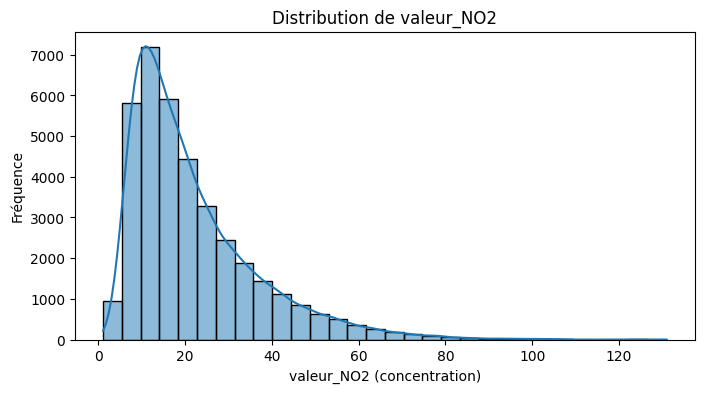

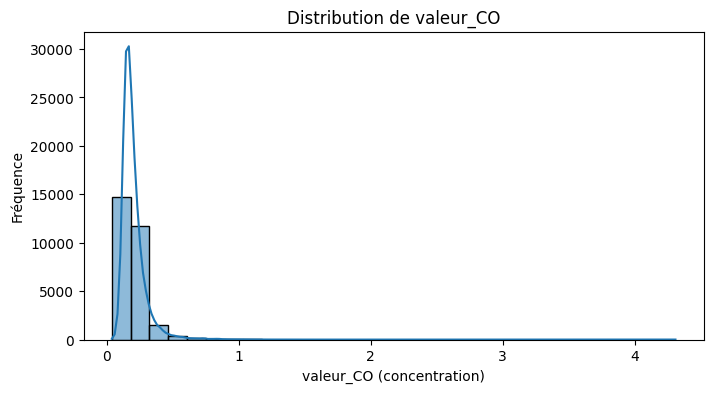

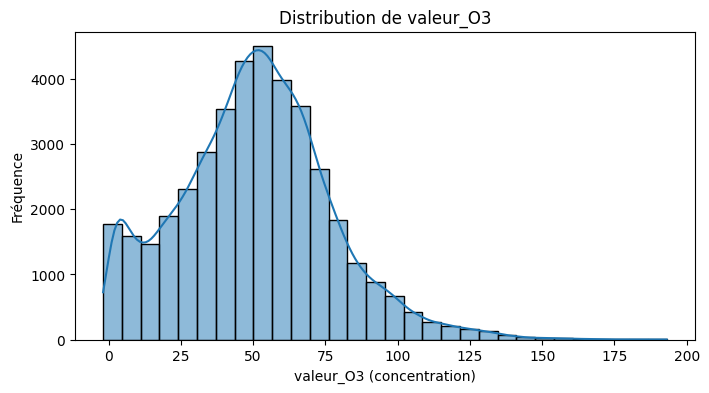

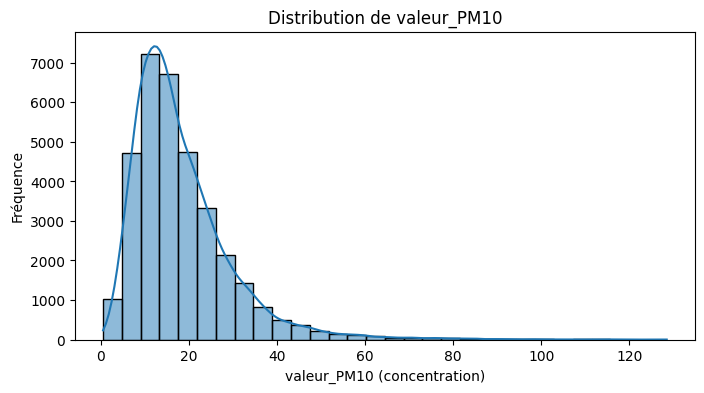

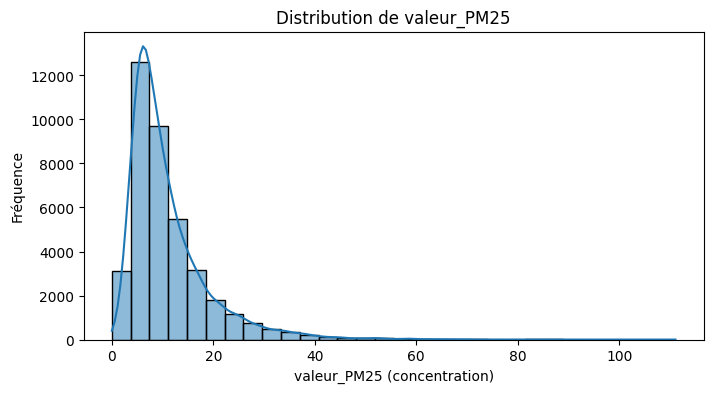

In [22]:
# List of pollutants
polluants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# Distribution of each pollutant
for pollutant in polluants:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[pollutant].dropna(), bins=30, kde=True)
    plt.title(f'Distribution de {pollutant}')
    plt.xlabel(f'{pollutant} (concentration)')
    plt.ylabel('Fréquence')
    plt.show()


### Data Visualisation

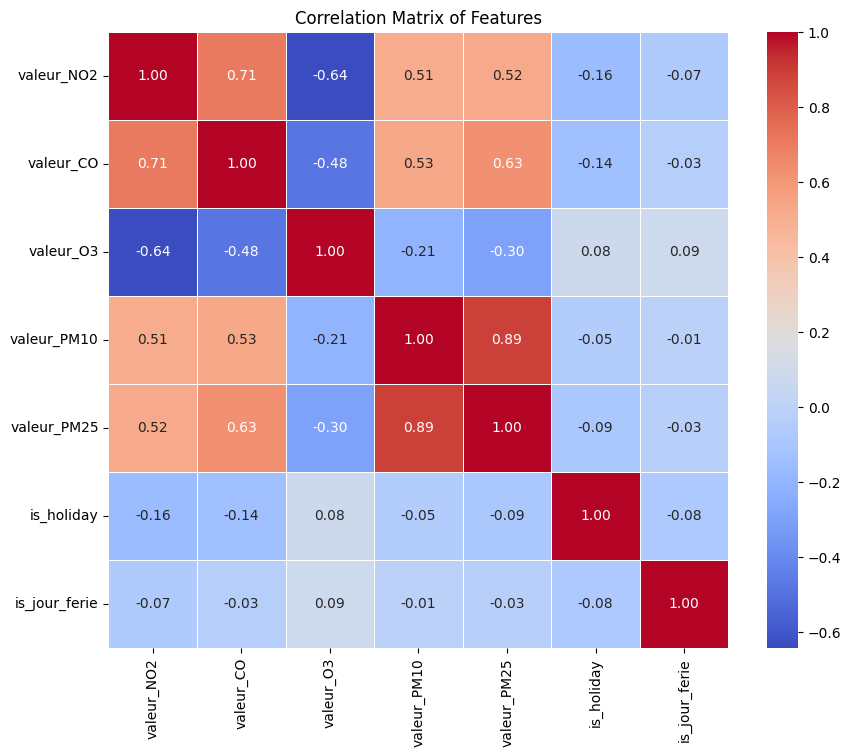

In [23]:
# Select only numeric columns
numeric_data = train.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

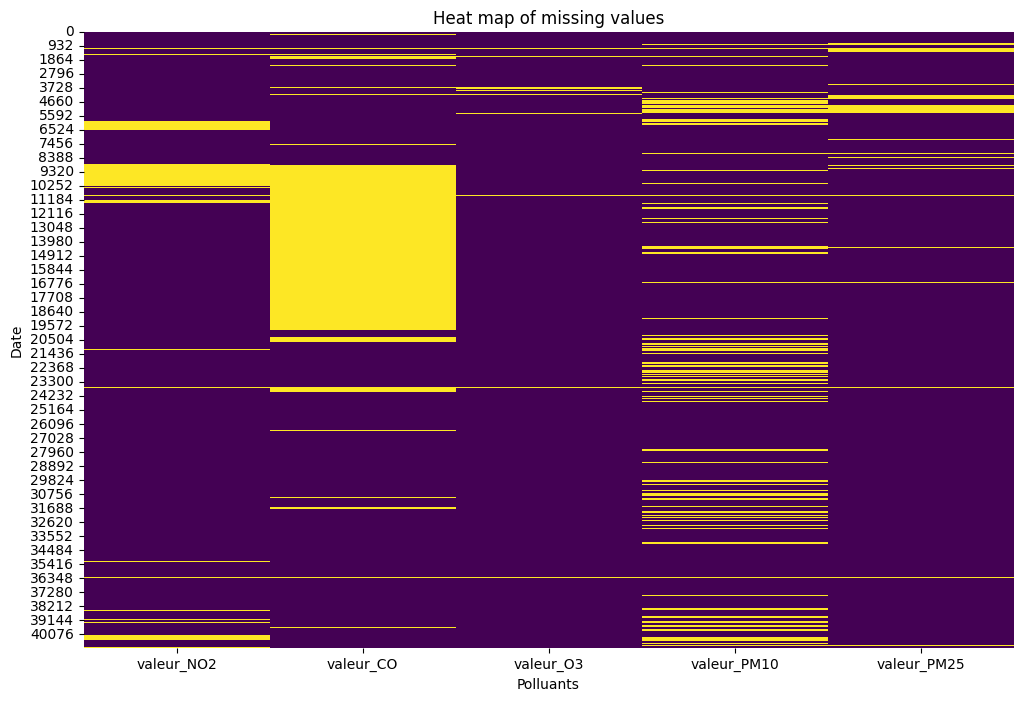

In [24]:
# View missing values for each pollutant
plt.figure(figsize=(12, 8))
sns.heatmap(train[polluants].isnull(), cbar=False, cmap="viridis")
plt.title("Heat map of missing values")
plt.xlabel("Polluants")
plt.ylabel("Date")
plt.show()


### Time Series Visualisation

#### Seasonal Trends

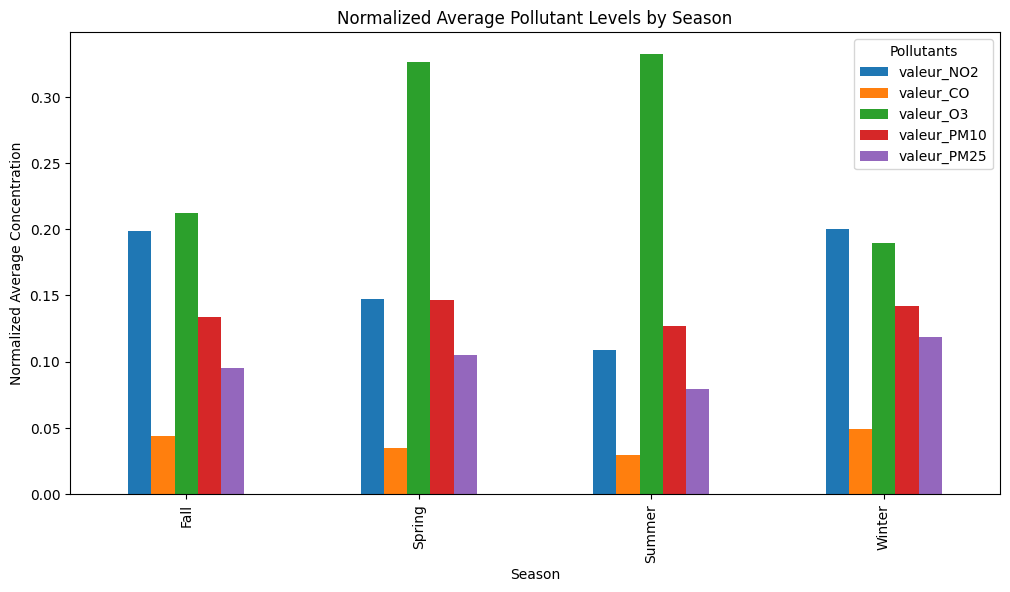

In [25]:
from sklearn.preprocessing import MinMaxScaler

train['id'] = pd.to_datetime(train['id'], format='%Y-%m-%d %H')
train.set_index('id', inplace=True)


# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add a 'season' column based on the month of each timestamp
train['season'] = train.index.month.map(get_season)

# List of pollutant columns
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# Normalize each pollutant column using Min-Max scaling
scaler = MinMaxScaler()
train[pollutants] = scaler.fit_transform(train[pollutants])

# Calculate the average for each normalized pollutant by season
seasonal_avg_normalized = train.groupby('season')[pollutants].mean()

# Plot the normalized seasonal averages
seasonal_avg_normalized.plot(kind='bar', figsize=(12, 6))
plt.title("Normalized Average Pollutant Levels by Season")
plt.ylabel("Normalized Average Concentration")
plt.xlabel("Season")
plt.legend(title="Pollutants")
plt.show()


#### Monthly & Weekly Trends

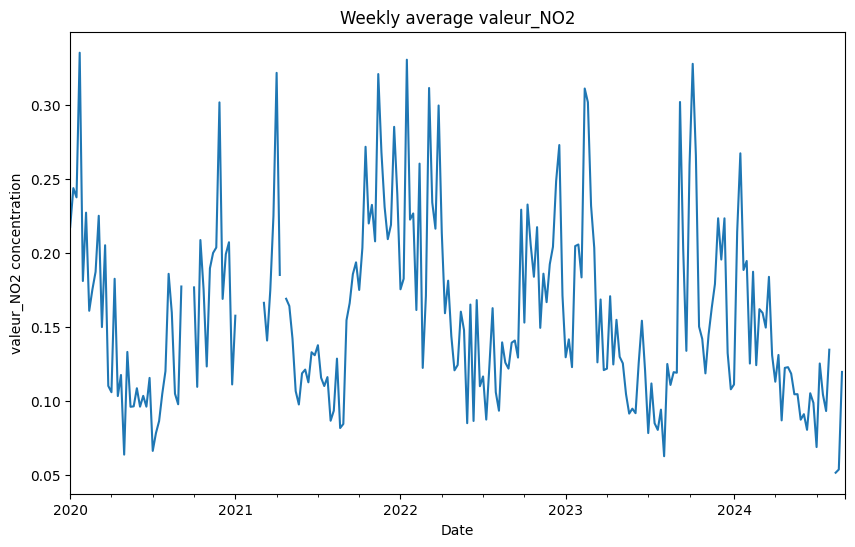

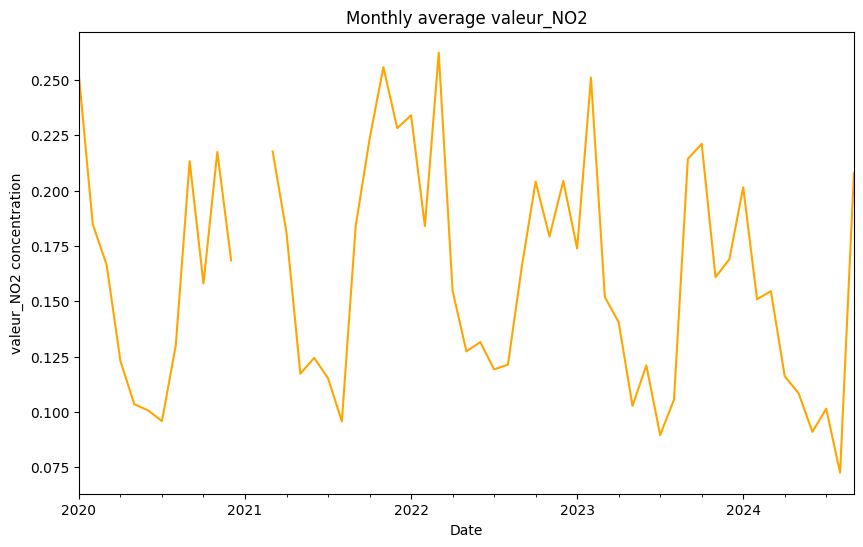

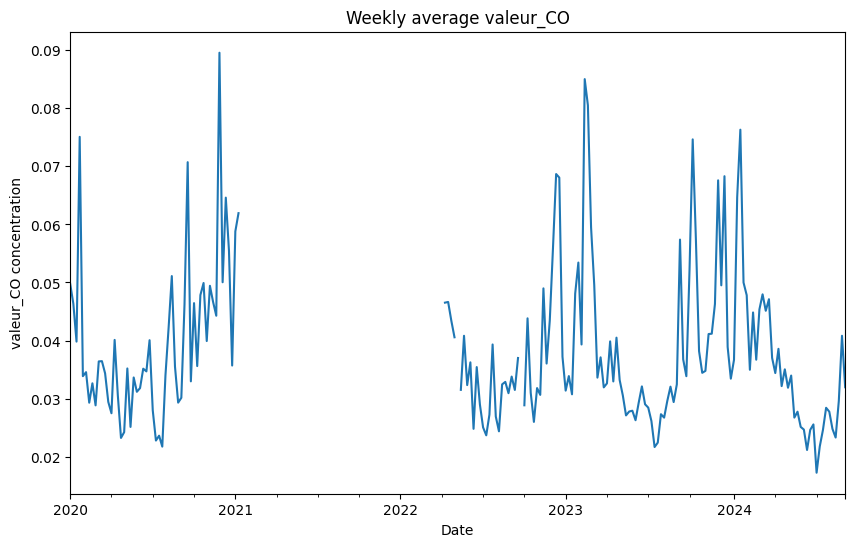

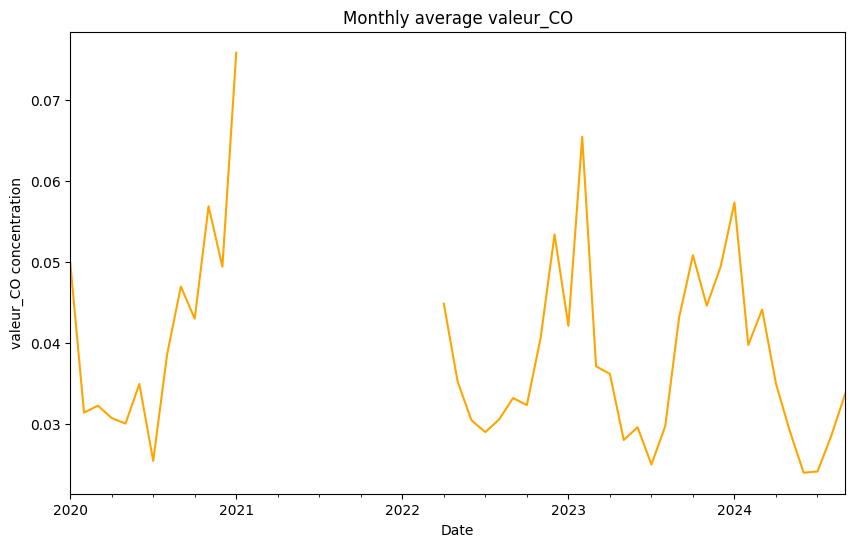

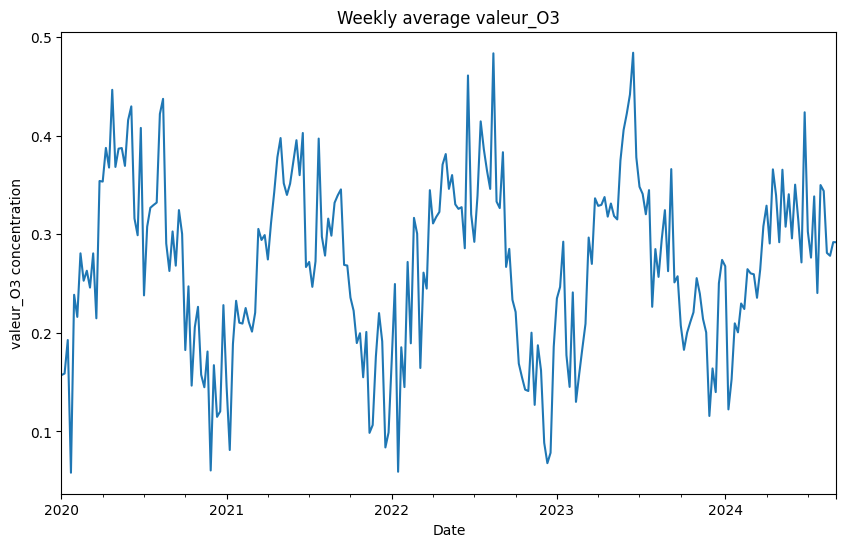

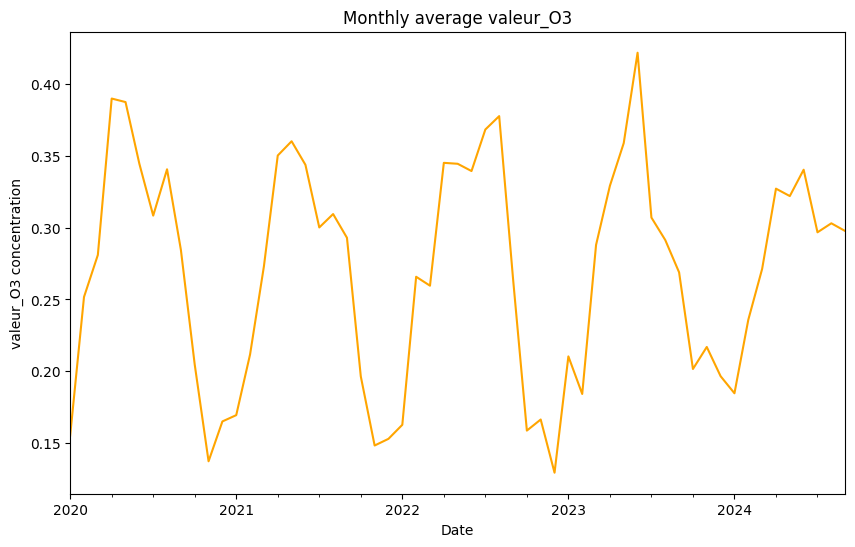

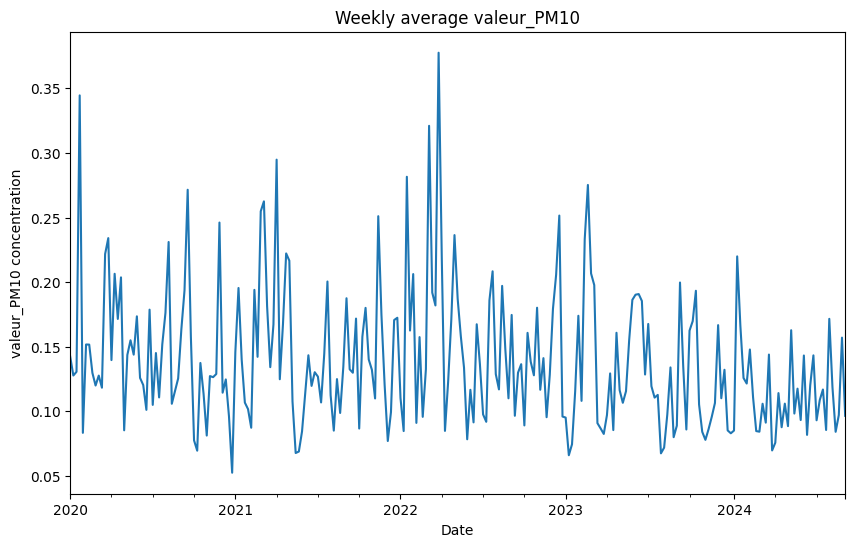

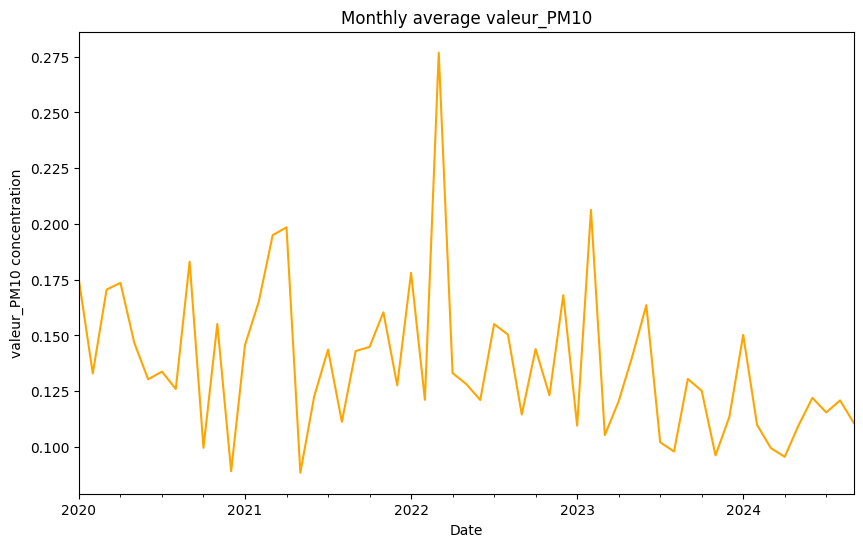

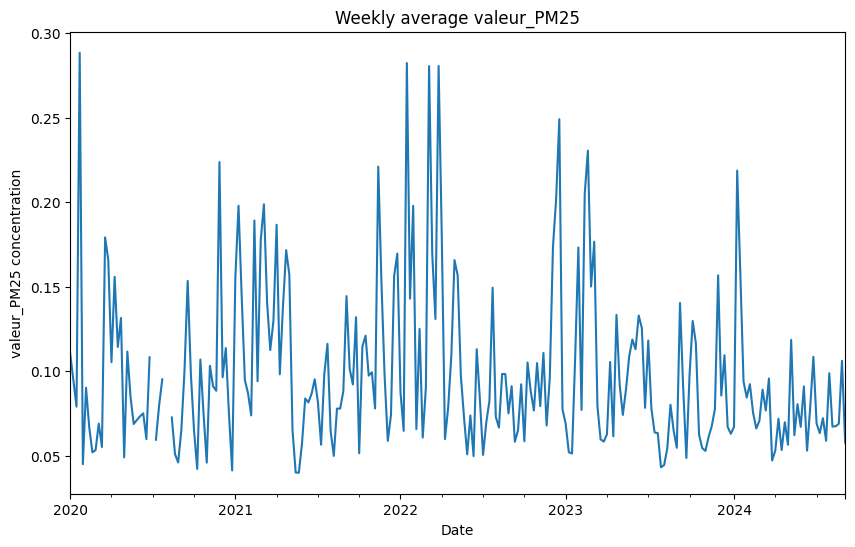

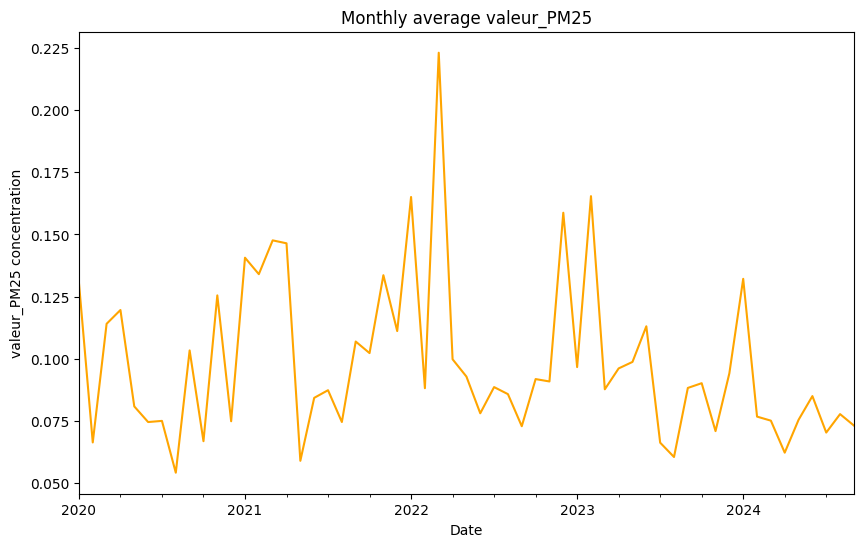

In [26]:
# List of pollutant columns
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

for pollutant in pollutants:
    # Weekly average
    weekly_avg = train[pollutant].resample('W').mean()
    weekly_avg.plot(figsize=(10, 6))
    plt.title(f"Weekly average {pollutant}")
    plt.ylabel(f"{pollutant} concentration")
    plt.xlabel("Date")
    plt.show()

    # Monthly average
    monthly_avg = train[pollutant].resample('M').mean()
    monthly_avg.plot(figsize=(10, 6), color='orange')
    plt.title(f"Monthly average {pollutant}")
    plt.ylabel(f"{pollutant} concentration")
    plt.xlabel("Date")
    plt.show()


Clear winter = more pollution


Let's look at weekly and daily trends


#### Daily Trends

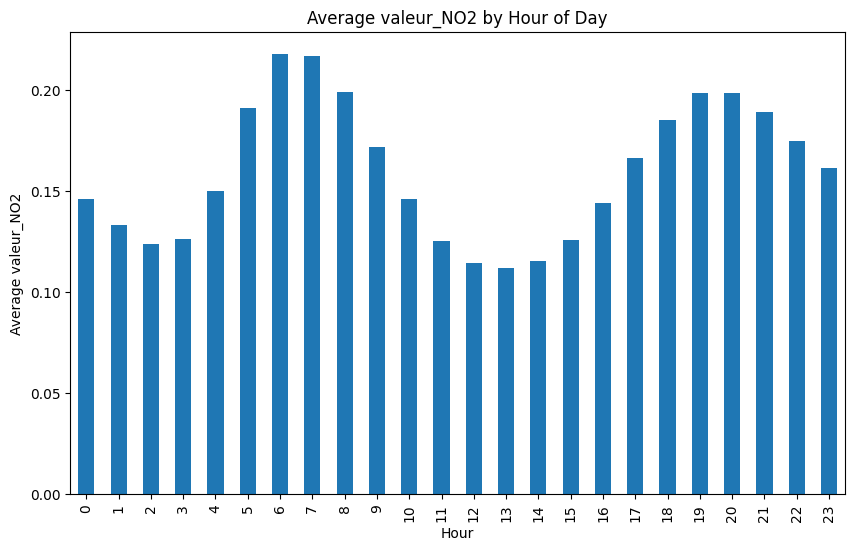

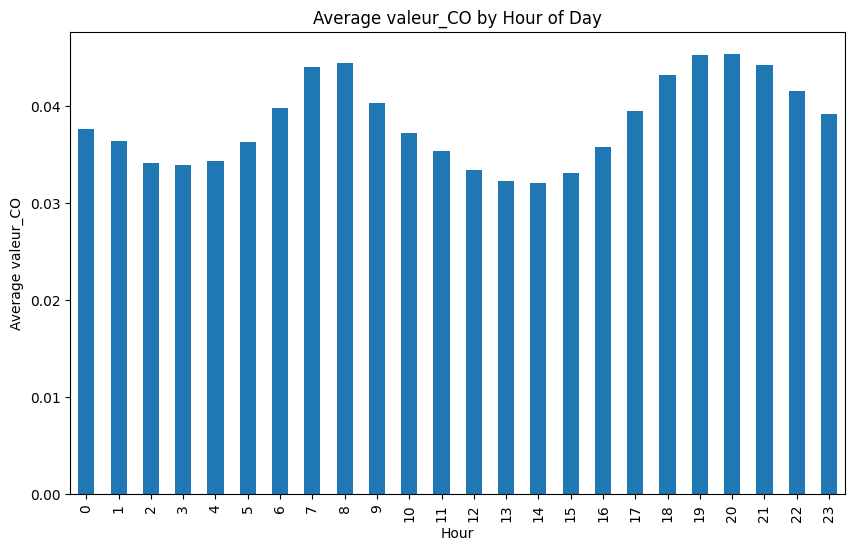

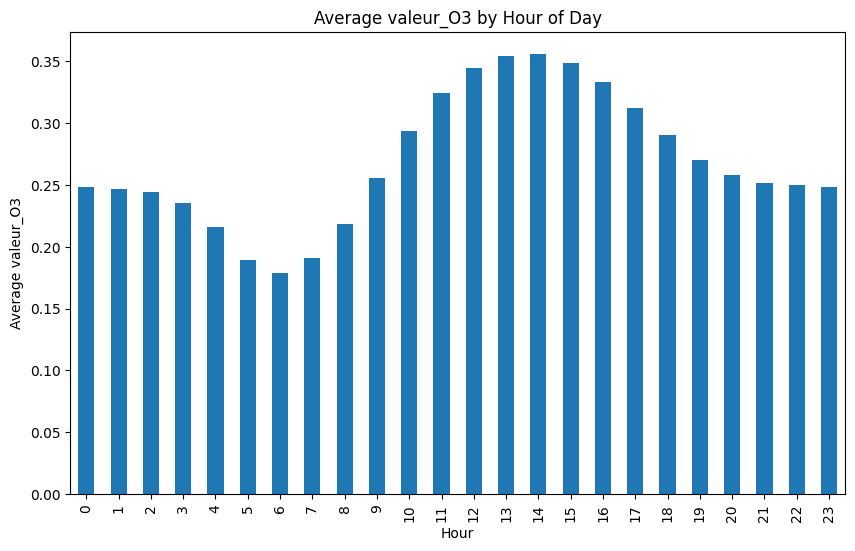

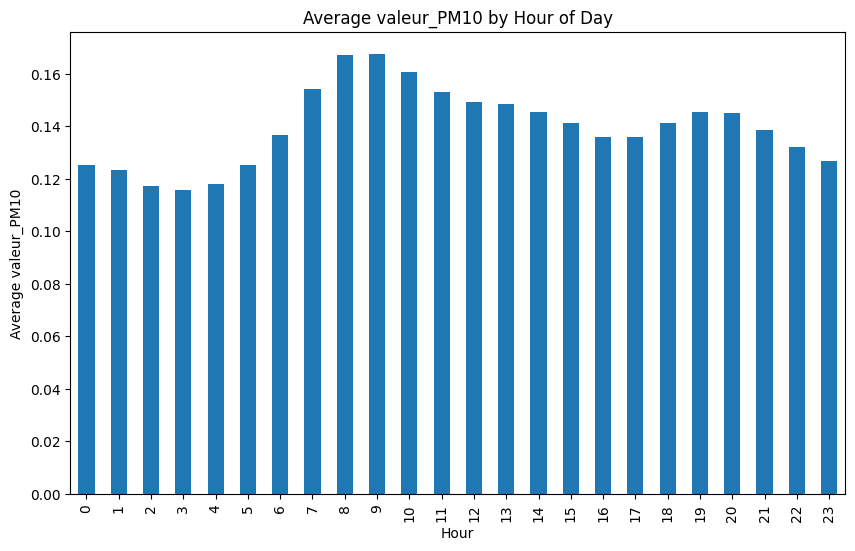

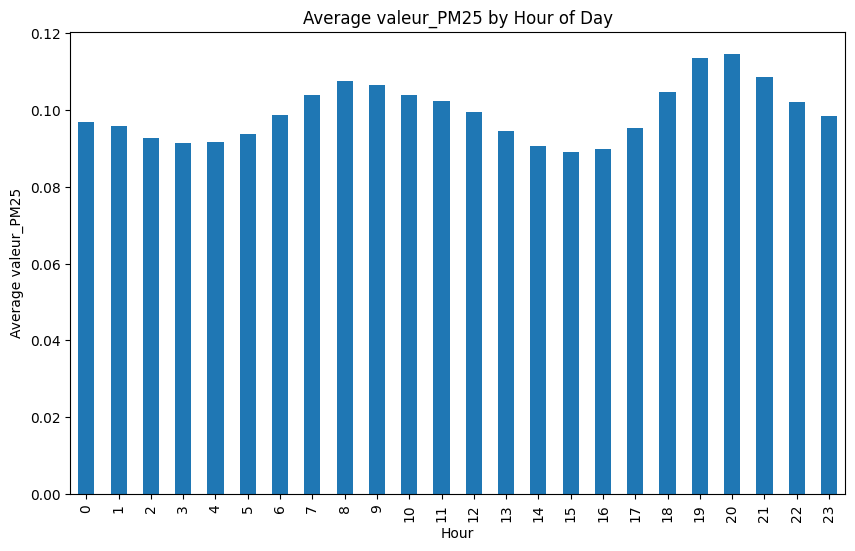

In [27]:
train['hour'] = train.index.hour

# List of pollutant columns
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# Plot average by hour for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    train.groupby('hour')[pollutant].mean().plot(kind='bar', title=f'Average {pollutant} by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel(f'Average {pollutant}')
    plt.show()


#### Weekday vs Weekend Trends

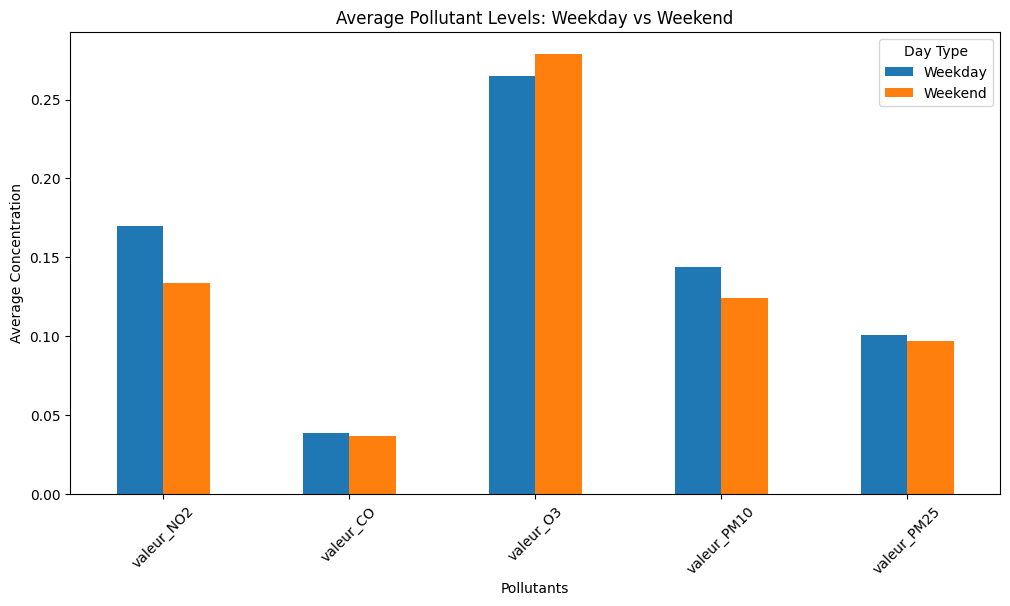

In [28]:
# Define a function to identify weekends
train['day_type'] = train.index.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate average levels by weekday and weekend for each pollutant
day_type_avg = train.groupby('day_type')[pollutants].mean()

# Plot the average pollutant levels by weekday vs weekend
day_type_avg.T.plot(kind='bar', figsize=(12, 6))  # Transpose for better labeling
plt.title("Average Pollutant Levels: Weekday vs Weekend")
plt.ylabel("Average Concentration")
plt.xlabel("Pollutants")
plt.legend(title="Day Type")
plt.xticks(rotation=45)
plt.show()


#### Holiday Trends

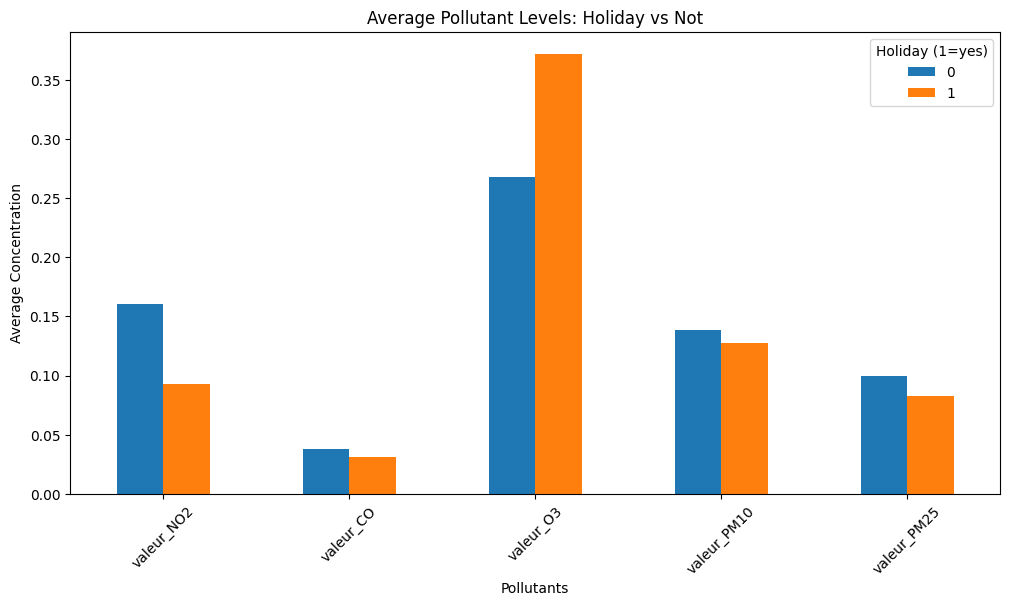

In [ ]:
# Calculate average levels by weekday and weekend for each pollutant
day_type_avg = train.groupby('is_jour_ferie')[pollutants].mean()

# Plot the average pollutant levels by weekday vs weekend
day_type_avg.T.plot(kind='bar', figsize=(12, 6))  # Transpose for better labeling
plt.title("Average Pollutant Levels: Holiday vs Not")
plt.ylabel("Average Concentration")
plt.xlabel("Pollutants")
plt.legend(title="Holiday (1=yes)")
plt.xticks(rotation=45)
plt.show()

#### Daily Trends

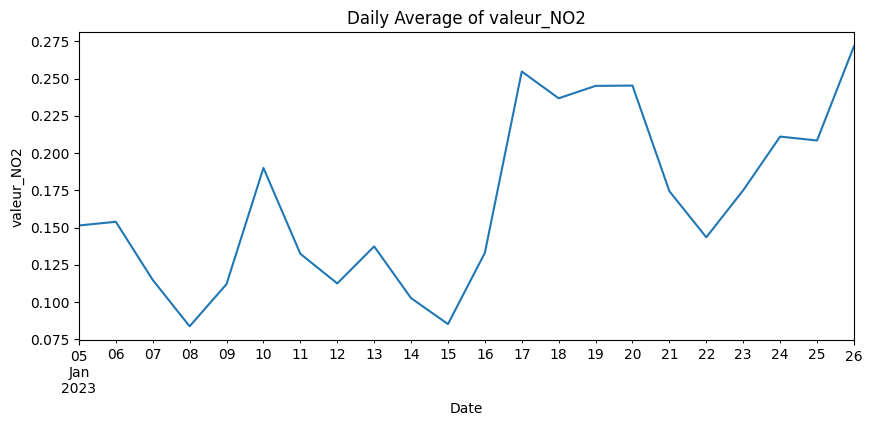

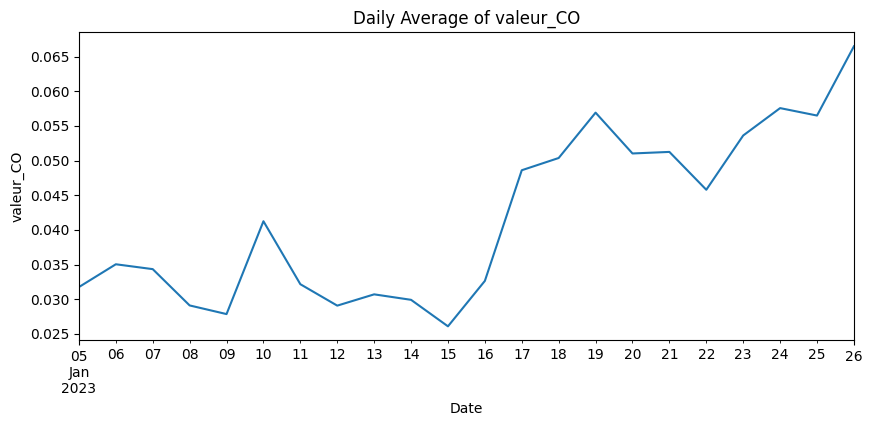

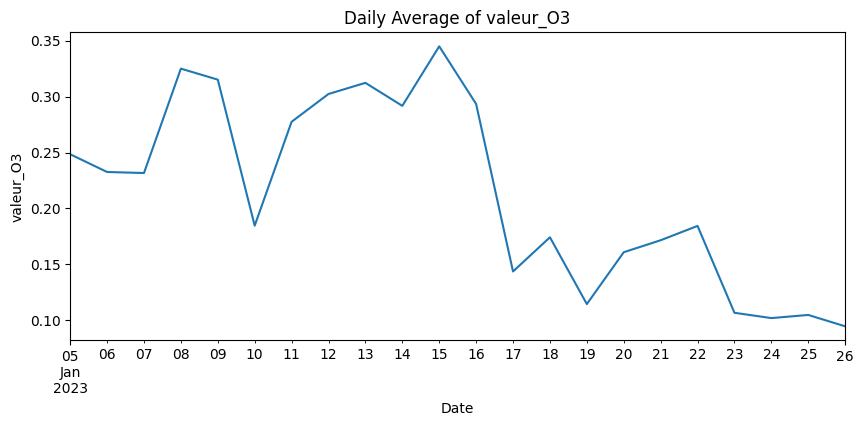

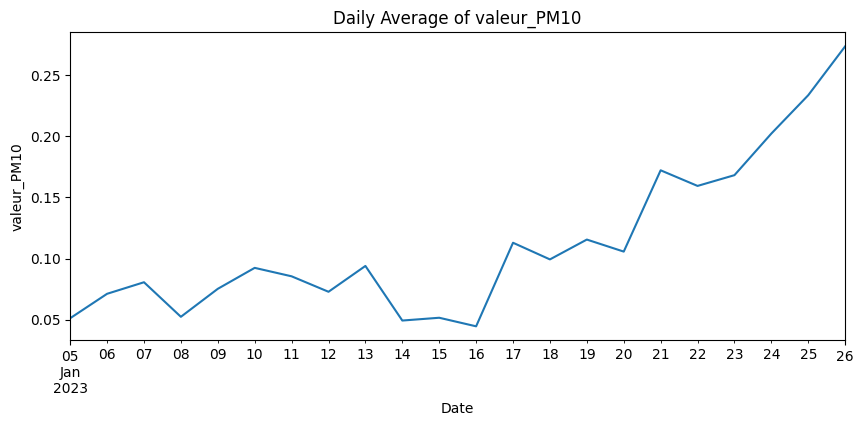

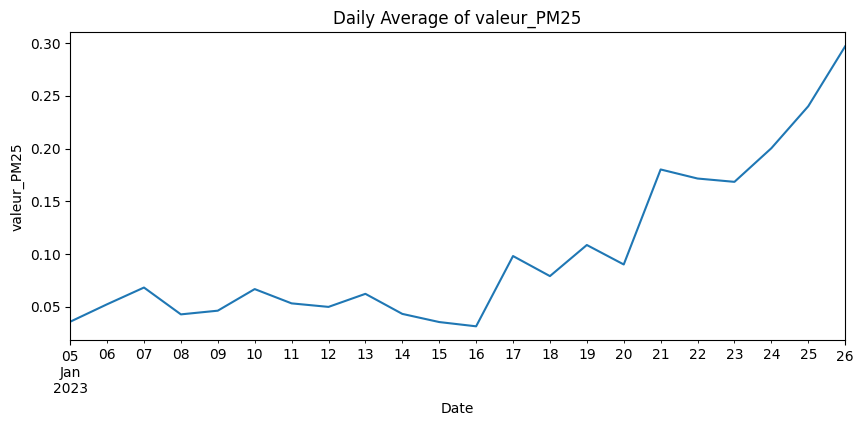

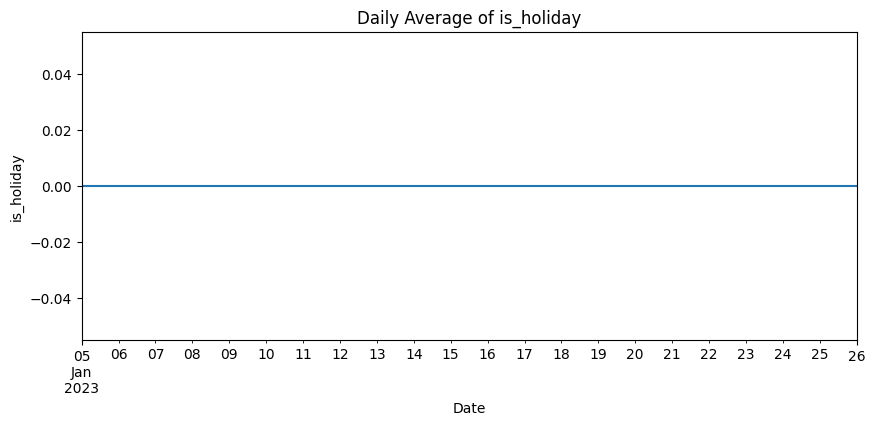

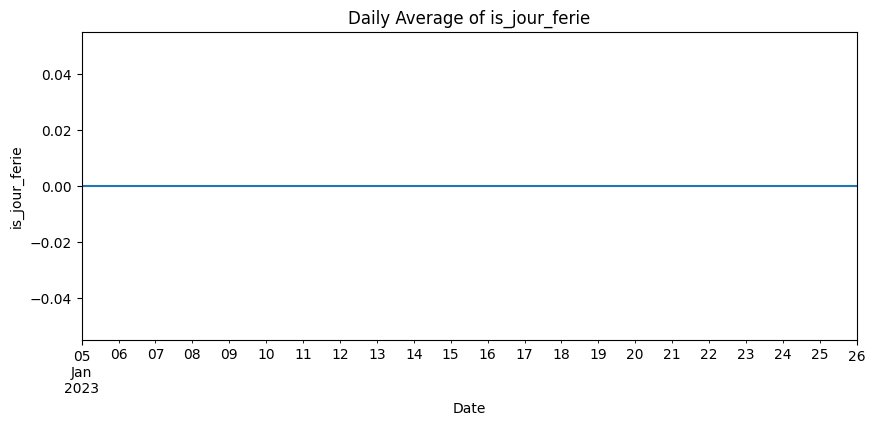

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that the index is a DatetimeIndex
if not isinstance(train.index, pd.DatetimeIndex):
    train.index = pd.to_datetime(train.index)

# Filter by date range directly on the index
filter = (train.index >= '2023-01-05') & (train.index <= '2023-01-26')
filtered_data = train[filter]

# Select only numeric columns for resampling
numeric_data = filtered_data.select_dtypes(include=['float64', 'int64'])

# Resample to calculate daily averages
daily_avg = numeric_data.resample('D').mean()

# Plot the daily average for each pollutant
for col in daily_avg.columns:
    plt.figure(figsize=(10, 4))
    daily_avg[col].plot(title=f"Daily Average of {col}")
    plt.ylabel(col)
    plt.xlabel("Date")
    plt.show()


Decrease at night and at the middle of the day, probably due to traffic

No clear weekly patterns

#### Decomposition Plot

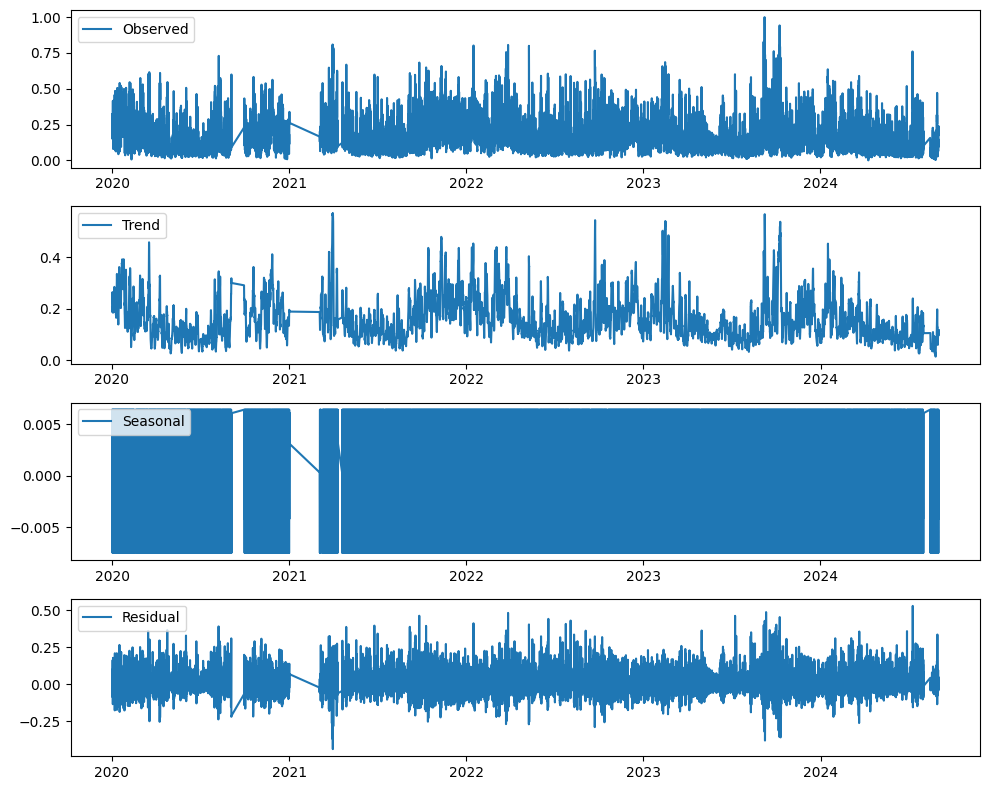

In [30]:

# Check if the index is already a DatetimeIndex; if not, convert it
if not isinstance(train.index, pd.DatetimeIndex):
    train.index = pd.to_datetime(train.index)

# Now you can proceed with further processing, such as decomposition or resampling
# For example, decomposing a pollutant series:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Select a pollutant (e.g., 'valeur_NO2') and ensure no missing values
pollutant_data = train['valeur_NO2'].dropna()

# Decompose with a specified period (e.g., 24 for daily seasonality if data is hourly)
decomposition = seasonal_decompose(pollutant_data, model='additive', period=24)

# Plot the decomposition
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


#### Rolling Statistics Plot

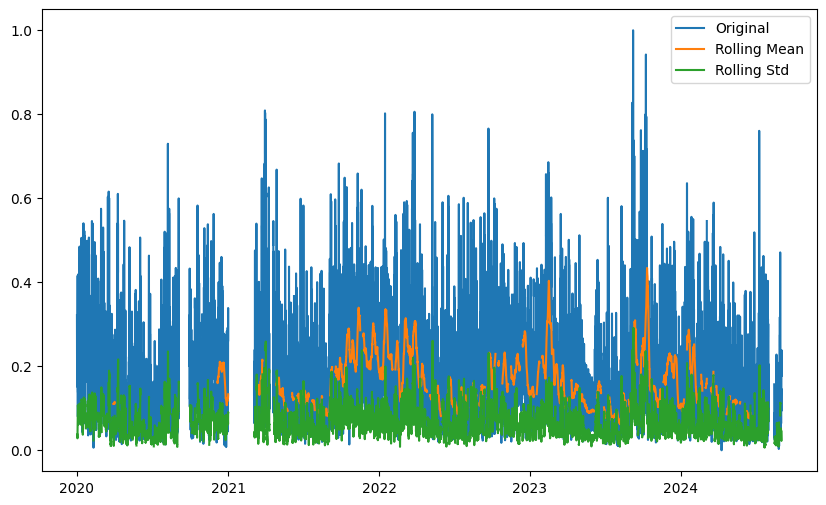

In [31]:
rolling_mean = train['valeur_NO2'].rolling(window=168).mean()
rolling_std = train['valeur_NO2'].rolling(window=24).std()
plt.figure(figsize=(10, 6))
plt.plot(train['valeur_NO2'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()


#### ACF & PACF

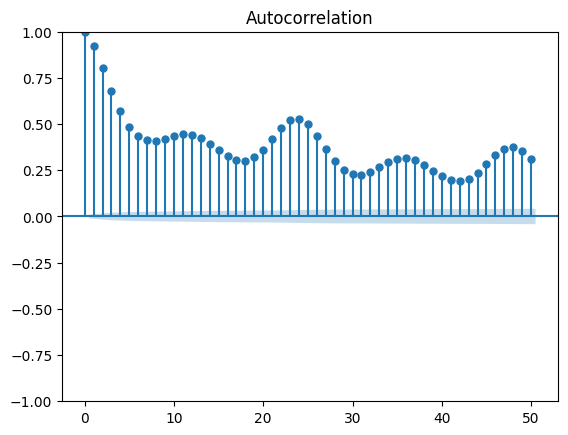

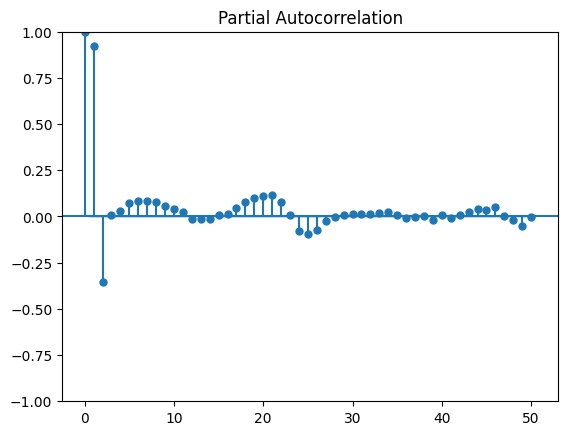

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train['valeur_NO2'].dropna(), lags=50)
plt.show()
plot_pacf(train['valeur_NO2'].dropna(), lags=50)
plt.show()


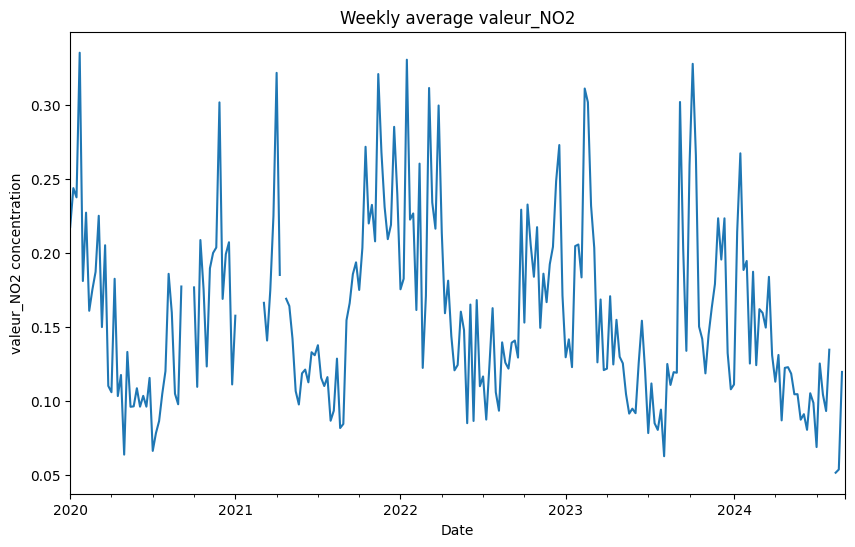

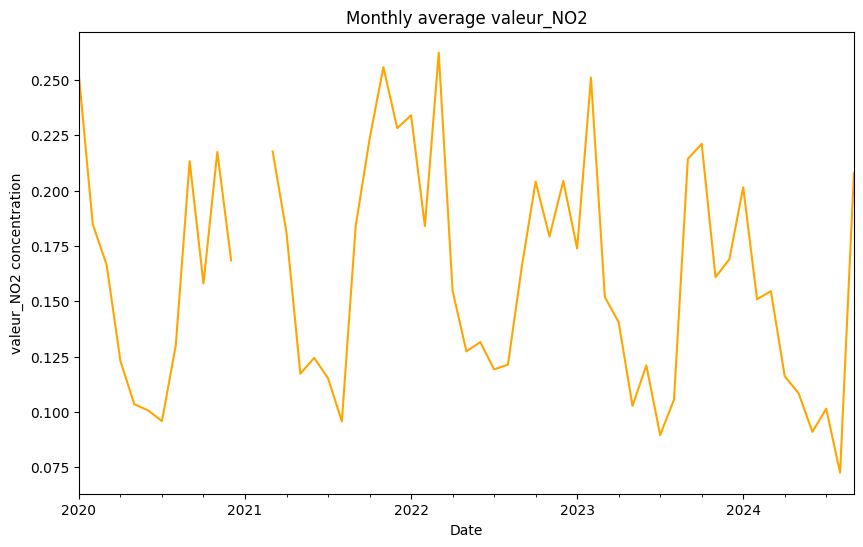

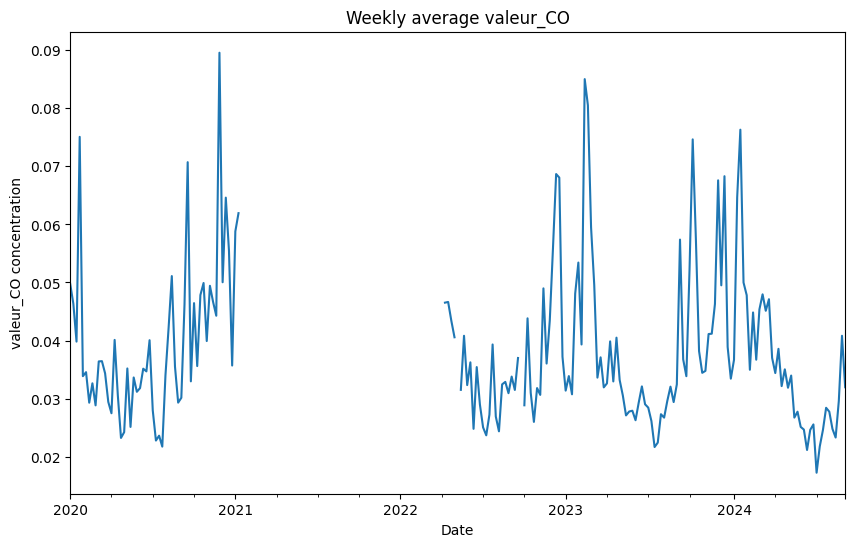

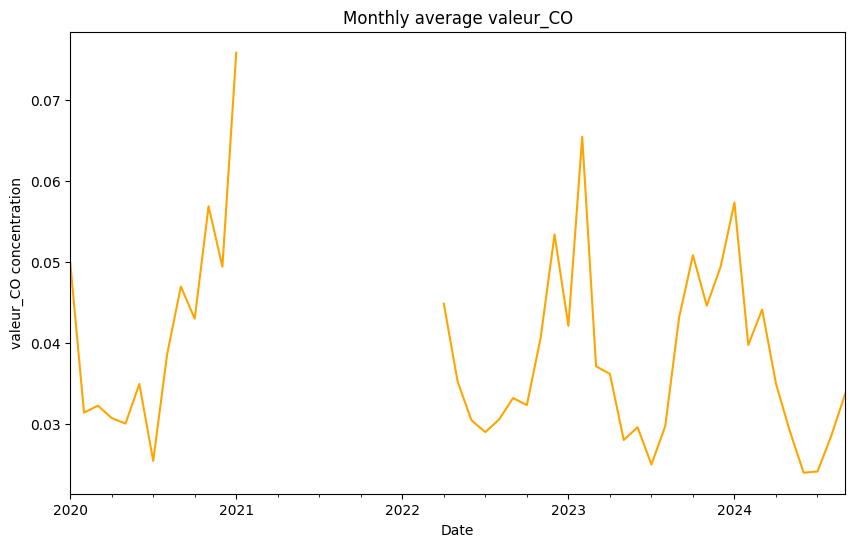

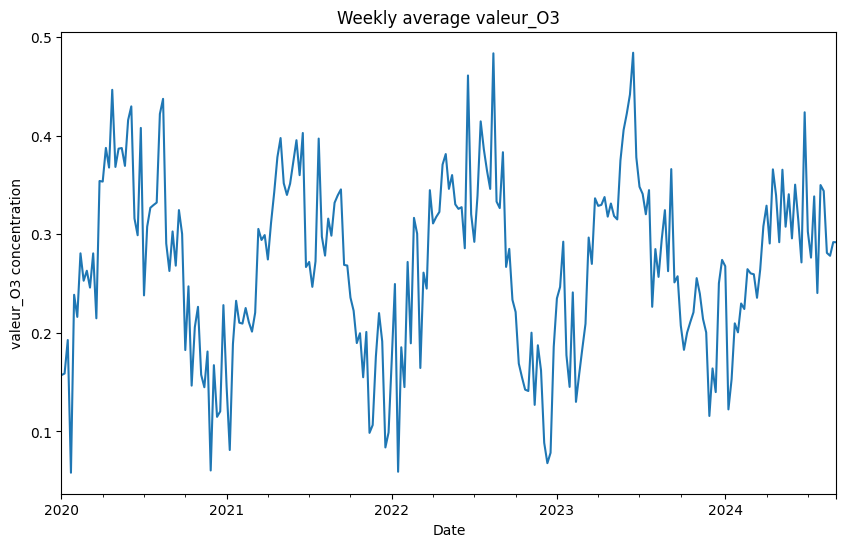

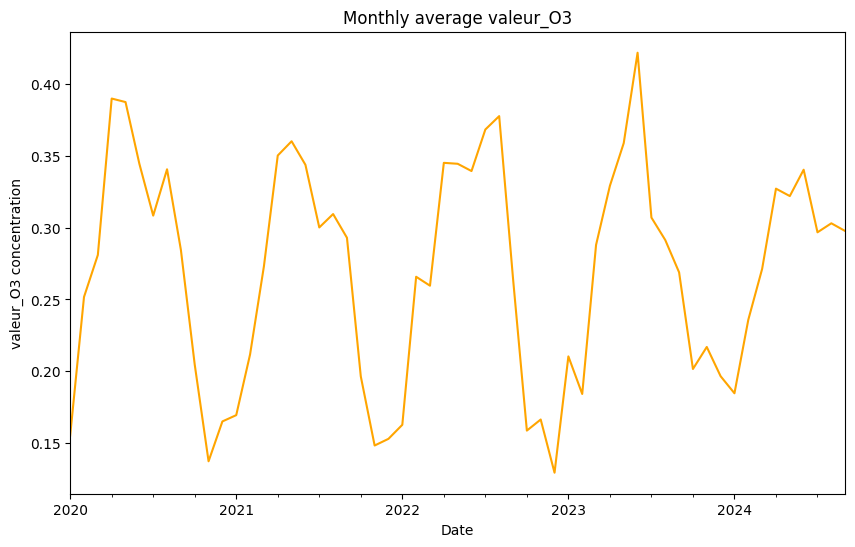

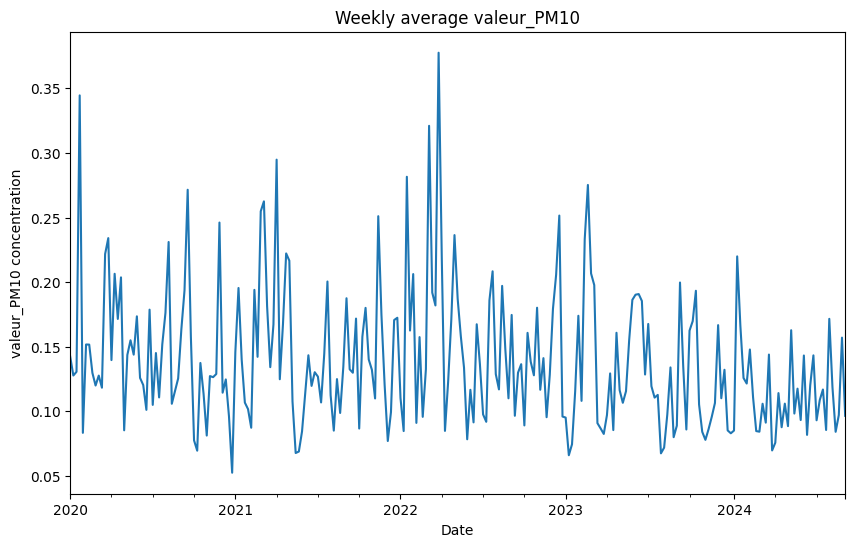

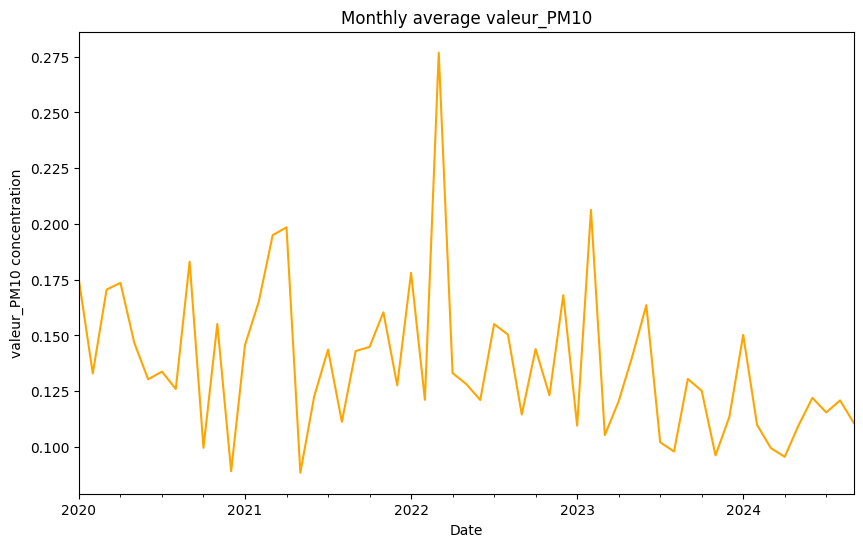

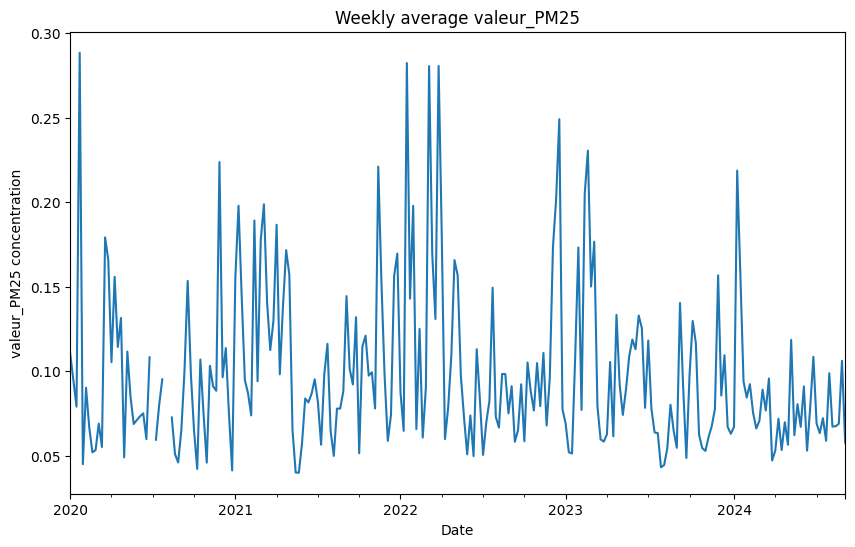

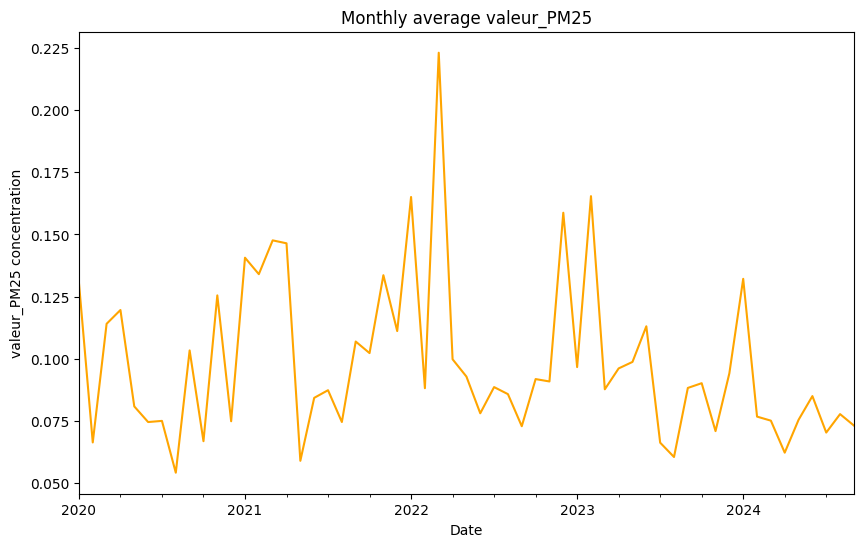

In [33]:
for pollutant in pollutants:
    # Weekly average
    weekly_avg = train[pollutant].resample('W').mean()
    weekly_avg.plot(figsize=(10, 6))
    plt.title(f"Weekly average {pollutant}")
    plt.ylabel(f"{pollutant} concentration")
    plt.xlabel("Date")
    plt.show()

    # Monthly average
    monthly_avg = train[pollutant].resample('M').mean()
    monthly_avg.plot(figsize=(10, 6), color='orange')
    plt.title(f"Monthly average {pollutant}")
    plt.ylabel(f"{pollutant} concentration")
    plt.xlabel("Date")
    plt.show()


#### Lag Plot

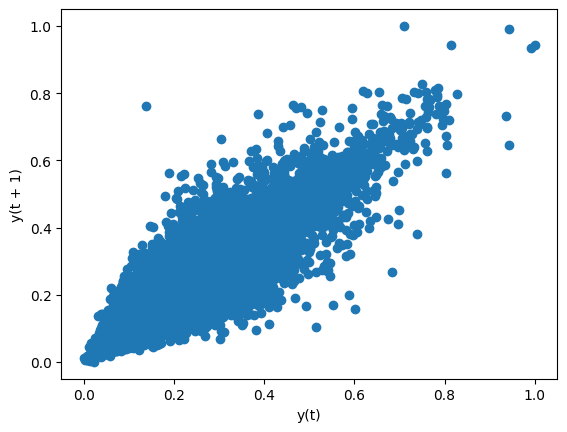

In [34]:
from pandas.plotting import lag_plot
lag_plot(train['valeur_NO2'])
plt.show()


#### Heatmap

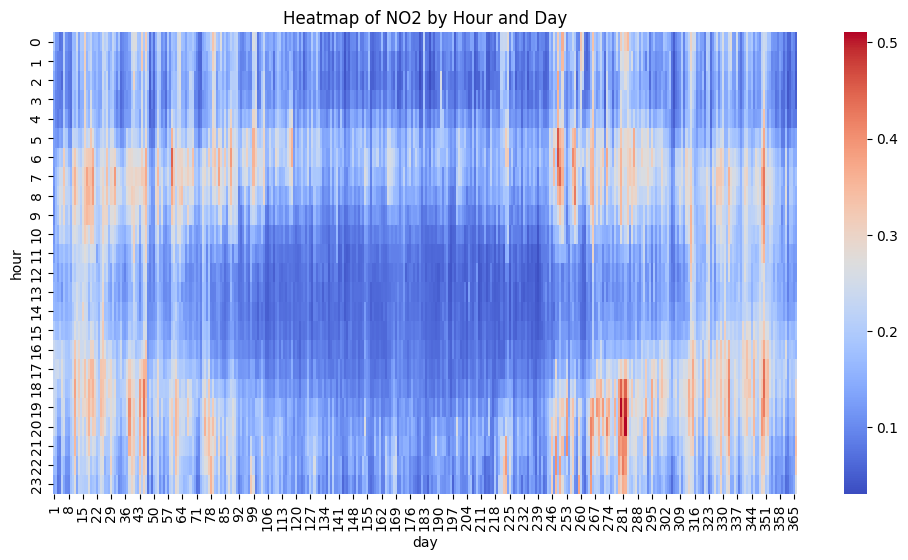

In [35]:
import seaborn as sns
train['day'] = train.index.dayofyear
train['hour'] = train.index.hour
pivot_table = train.pivot_table(values='valeur_NO2', index='hour', columns='day')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Heatmap of NO2 by Hour and Day')
plt.show()
